In [2]:
import pandas as pd
df=pd.read_csv('Datasets/dt.csv')
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [7]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
df=df.apply(lambda x: lbl.fit_transform(x) if x.dtype=='object' else x)
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,1,0
1,42,12,4,2,0
2,23,4,6,0,0
3,52,4,4,2,0
4,43,21,8,2,1
5,44,14,5,1,0
6,66,3,7,0,1
7,35,14,9,1,1
8,52,13,7,0,1
9,35,5,9,0,1


In [8]:
df.corr()

,Age,Experience,Rank,Nationality,Go
Age,1.000000,0.216344,-0.055215,-0.115423,0.202121
Experience,0.216344,1.000000,0.218768,0.267281,0.170393
Rank,-0.055215,0.218768,1.000000,-0.427900,0.679815
Nationality,-0.115423,0.267281,-0.427900,1.000000,-0.393398
Go,0.202121,0.170393,0.679815,-0.393398,1.000000


<Axes: >

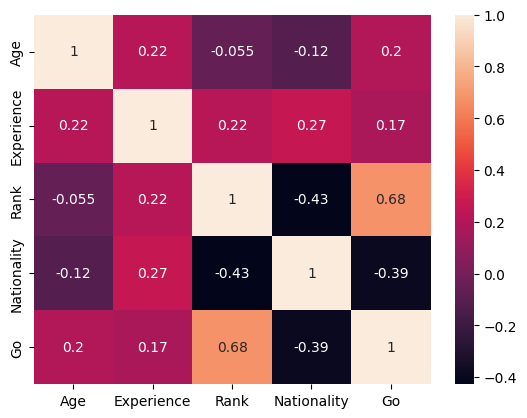

In [10]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [14]:
independent=['Age','Experience','Rank','Nationality']
x=df[independent]
x

,Age,Experience,Rank,Nationality
0,36,10,9,1
1,42,12,4,2
2,23,4,6,0
3,52,4,4,2
4,43,21,8,2
5,44,14,5,1
6,66,3,7,0
7,35,14,9,1
8,52,13,7,0
9,35,5,9,0


In [15]:
y=df['Go']
y

0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int32

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
xtrain

,Age,Experience,Rank,Nationality
10,24,3,5,2
2,23,4,6,0
8,52,13,7,0
1,42,12,4,2
7,35,14,9,1
9,35,5,9,0
3,52,4,4,2
0,36,10,9,1
5,44,14,5,1
12,45,9,9,1


In [18]:
ytrain

10    0
2     0
8     1
1     0
7     1
9     1
3     0
0     0
5     0
12    1
Name: Go, dtype: int32

In [21]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [24]:
ypred=model.predict(xtest)
ypred

array([1.07669352, 0.08551001, 0.52084426])

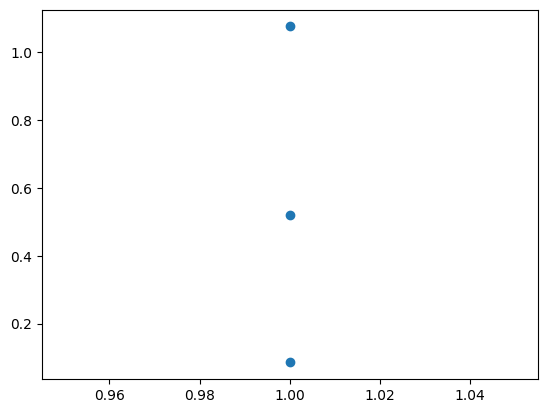

In [32]:
import matplotlib.pyplot as plt
plt.scatter(ytest,ypred)